In [ ]:
from keras.utils import to_categorical
from keras.preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os
import pandas as pd
import numpy as np

In [ ]:
TRAIN_DIR = '/content/drive/MyDrive/Teachmint split_config.xxhdpi.apk (Unzipped Files)/Dlpro/images/train'
TEST_DIR = '/content/drive/MyDrive/Teachmint split_config.xxhdpi.apk (Unzipped Files)/Dlpro/images/validation'

In [ ]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths,labels

In [ ]:
train = pd.DataFrame()
train['image'], train['label'] = createdataframe(TRAIN_DIR)

surprise completed
sad completed
neutral completed
happy completed
fear completed
disgust completed
angry completed


In [ ]:
train.describe()

,image,label
count,28882,28882
unique,28882,7
top,/content/drive/MyDrive/Teachmint split_config....,happy
freq,1,7214


In [ ]:
print(train)

                                                   image     label
0      /content/drive/MyDrive/Teachmint split_config....  surprise
1      /content/drive/MyDrive/Teachmint split_config....  surprise
2      /content/drive/MyDrive/Teachmint split_config....  surprise
3      /content/drive/MyDrive/Teachmint split_config....  surprise
4      /content/drive/MyDrive/Teachmint split_config....  surprise
...                                                  ...       ...
28877  /content/drive/MyDrive/Teachmint split_config....     angry
28878  /content/drive/MyDrive/Teachmint split_config....     angry
28879  /content/drive/MyDrive/Teachmint split_config....     angry
28880  /content/drive/MyDrive/Teachmint split_config....     angry
28881  /content/drive/MyDrive/Teachmint split_config....     angry

[28882 rows x 2 columns]


In [ ]:
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(TEST_DIR)

fear completed
angry completed
neutral completed
disgust completed
surprise completed
happy completed
sad completed


In [ ]:
test.head()

,image,label
0,/content/drive/MyDrive/Teachmint split_config....,fear
1,/content/drive/MyDrive/Teachmint split_config....,fear
2,/content/drive/MyDrive/Teachmint split_config....,fear
3,/content/drive/MyDrive/Teachmint split_config....,fear
4,/content/drive/MyDrive/Teachmint split_config....,fear


In [ ]:
print(test)

                                                  image label
0     /content/drive/MyDrive/Teachmint split_config....  fear
1     /content/drive/MyDrive/Teachmint split_config....  fear
2     /content/drive/MyDrive/Teachmint split_config....  fear
3     /content/drive/MyDrive/Teachmint split_config....  fear
4     /content/drive/MyDrive/Teachmint split_config....  fear
...                                                 ...   ...
7061  /content/drive/MyDrive/Teachmint split_config....   sad
7062  /content/drive/MyDrive/Teachmint split_config....   sad
7063  /content/drive/MyDrive/Teachmint split_config....   sad
7064  /content/drive/MyDrive/Teachmint split_config....   sad
7065  /content/drive/MyDrive/Teachmint split_config....   sad

[7066 rows x 2 columns]


In [ ]:
print(test)
print(test['image'])

                                                  image label
0     /content/drive/MyDrive/Teachmint split_config....  fear
1     /content/drive/MyDrive/Teachmint split_config....  fear
2     /content/drive/MyDrive/Teachmint split_config....  fear
3     /content/drive/MyDrive/Teachmint split_config....  fear
4     /content/drive/MyDrive/Teachmint split_config....  fear
...                                                 ...   ...
7061  /content/drive/MyDrive/Teachmint split_config....   sad
7062  /content/drive/MyDrive/Teachmint split_config....   sad
7063  /content/drive/MyDrive/Teachmint split_config....   sad
7064  /content/drive/MyDrive/Teachmint split_config....   sad
7065  /content/drive/MyDrive/Teachmint split_config....   sad

[7066 rows x 2 columns]
0       /content/drive/MyDrive/Teachmint split_config....
1       /content/drive/MyDrive/Teachmint split_config....
2       /content/drive/MyDrive/Teachmint split_config....
3       /content/drive/MyDrive/Teachmint split_config....

In [ ]:
from tqdm.notebook import tqdm

In [ ]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image,grayscale =  True )
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features),48,48,1)
    return features

In [ ]:
train_features = extract_features(train['image'])

  0%|          | 0/28882 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/keras/src/utils/image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(


In [ ]:
test_features = extract_features(test['image'])

  0%|          | 0/7066 [00:00<?, ?it/s]

In [ ]:
x_train = train_features/255.0
x_test = test_features/255.0

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [ ]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [ ]:
y_train = to_categorical(y_train,num_classes = 7)
y_test = to_categorical(y_test,num_classes = 7)

In [ ]:
model = Sequential()
# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(7, activation='softmax'))

In [ ]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = 'accuracy' )

In [ ]:
model.fit(x= x_train,y = y_train, batch_size = 128, epochs = 200, validation_data = (x_test,y_test))

Epoch 1/200
226/226 [==============================] - 25s 56ms/step - loss: 1.8226 - accuracy: 0.2464 - val_loss: 1.8128 - val_accuracy: 0.2583
Epoch 2/200
226/226 [==============================] - 11s 50ms/step - loss: 1.7879 - accuracy: 0.2582 - val_loss: 1.6889 - val_accuracy: 0.3082
Epoch 3/200
226/226 [==============================] - 11s 50ms/step - loss: 1.6719 - accuracy: 0.3201 - val_loss: 1.5680 - val_accuracy: 0.3600
Epoch 4/200
226/226 [==============================] - 12s 53ms/step - loss: 1.5260 - accuracy: 0.4042 - val_loss: 1.3969 - val_accuracy: 0.4735
Epoch 5/200
226/226 [==============================] - 12s 53ms/step - loss: 1.4368 - accuracy: 0.4462 - val_loss: 1.3222 - val_accuracy: 0.4962
Epoch 6/200
226/226 [==============================] - 12s 53ms/step - loss: 1.3865 - accuracy: 0.4666 - val_loss: 1.2787 - val_accuracy: 0.5075
Epoch 7/200
226/226 [==============================] - 12s 54ms/step - loss: 1.3514 - accuracy: 0.4784 - val_loss: 1.2535 - val_ac

In [ ]:
from sklearn.metrics import classification_report

y_pred = np.argmax(model.predict(x_test),axis = -1)
report = classification_report(np.argmax(y_test, axis=1), y_pred)
print("Classification Report:\n", report)

221/221 [==============================] - 1s 6ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.51      0.55       960
           1       0.87      0.59      0.70       111
           2       0.55      0.44      0.49      1018
           3       0.83      0.83      0.83      1825
           4       0.53      0.59      0.56      1216
           5       0.47      0.57      0.51      1139
           6       0.77      0.76      0.77       797

    accuracy                           0.64      7066
   macro avg       0.66      0.61      0.63      7066
weighted avg       0.64      0.64      0.64      7066



In [ ]:
from sklearn.metrics import confusion_matrix

y_pred = np.argmax(model.predict(x_test),axis = -1)
confusion = confusion_matrix(np.argmax(y_test, axis=1), y_pred)
print("Confusion Matrix:\n", confusion)

221/221 [==============================] - 1s 6ms/step
Confusion Matrix:
 [[ 486    4   94   54  143  159   20]
 [  16   65   10    3    5    8    4]
 [ 105    2  451   42  123  208   87]
 [  36    0   37 1509  103   98   42]
 [  73    0   60  104  717  247   15]
 [  90    3  100   58  223  652   13]
 [  13    1   61   53   32   30  607]]


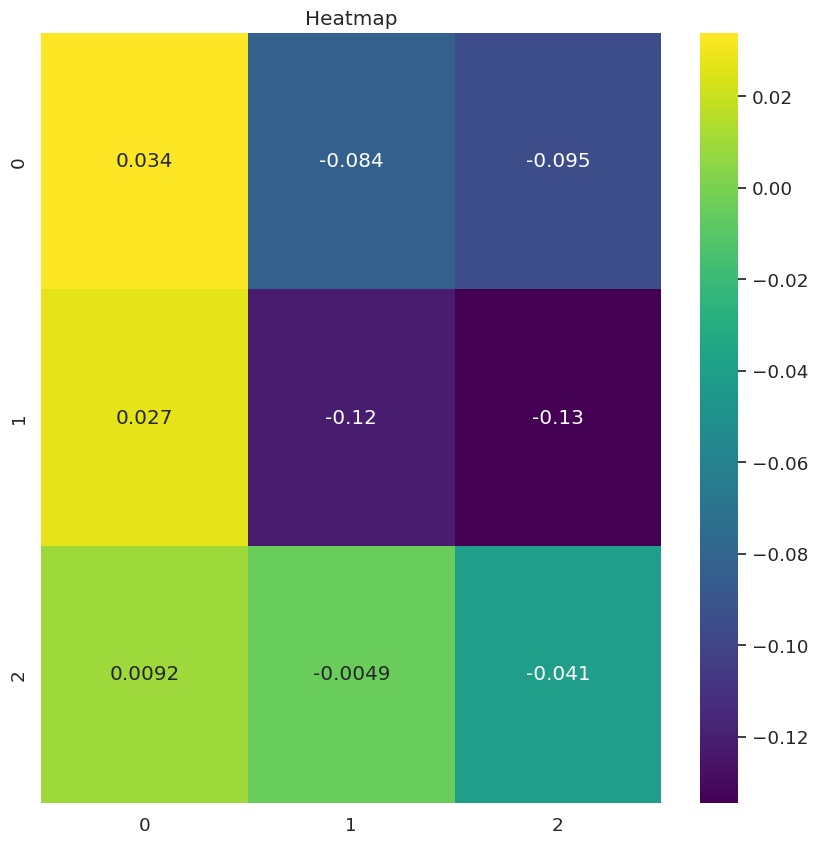

In [ ]:
first_layer  = model.layers[0].get_weights()[0]
plt.figure(figsize = (10,10))
sns.heatmap(first_layer[:,:,0,0], cmap = "viridis", annot = True)
plt.title("Heatmap")
plt.show()

In [ ]:
model_json = model.to_json()
with open("emotiondetector.json",'w') as json_file:
    json_file.write(model_json)
model.save("emotiondetector.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:

import shutil
source="emotiondetector.json"
destination="/content/drive/MyDrive/Teachmint split_config.xxhdpi.apk (Unzipped Files)/Dlpro/images"
shutil.copy(source,destination)



'/content/drive/MyDrive/Teachmint split_config.xxhdpi.apk (Unzipped Files)/Dlpro/images/emotiondetector.json'

In [ ]:

import shutil
source="emotiondetector.h5"
destination="/content/drive/MyDrive/Teachmint split_config.xxhdpi.apk (Unzipped Files)/Dlpro/images"
shutil.copy(source,destination)

'/content/drive/MyDrive/Teachmint split_config.xxhdpi.apk (Unzipped Files)/Dlpro/images/emotiondetector.h5'

In [ ]:
from keras.models import model_from_json

json_file = open("/content/drive/MyDrive/Teachmint split_config.xxhdpi.apk (Unzipped Files)/Dlpro/images/emotiondetector.json", "r")
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)
model.load_weights("/content/drive/MyDrive/Teachmint split_config.xxhdpi.apk (Unzipped Files)/Dlpro/images/emotiondetector.h5")

In [ ]:
label = ['angry','disgust','fear','happy','neutral','sad','surprise']

In [ ]:
def ef(image):
    img = load_img(image,grayscale =  True )
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

original image is of sad


/usr/local/lib/python3.10/dist-packages/keras/src/utils/image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(


1/1 [==============================] - 0s 298ms/step
model prediction is  sad


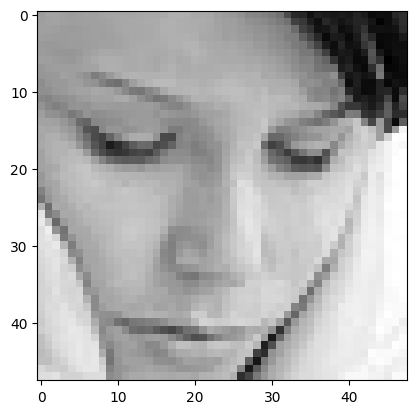

In [ ]:
image = '/content/drive/MyDrive/Teachmint split_config.xxhdpi.apk (Unzipped Files)/Dlpro/42.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of fear
1/1 [==============================] - 0s 97ms/step
model prediction is  fear


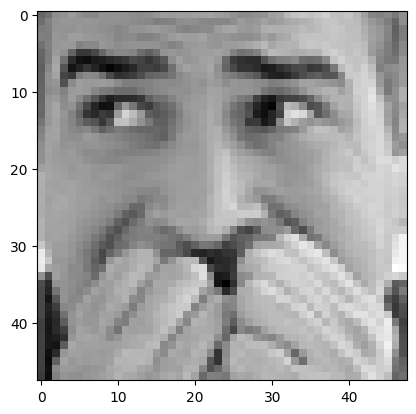

In [ ]:
image = '/content/drive/MyDrive/190.jpg'
print("original image is of fear")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of disgust
1/1 [==============================] - 0s 20ms/step
model prediction is  disgust


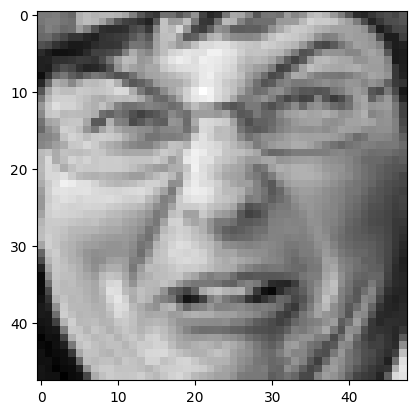

In [ ]:
image = '/content/drive/MyDrive/299.jpg'
print("original image is of disgust")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of happy
1/1 [==============================] - 0s 20ms/step
model prediction is  happy


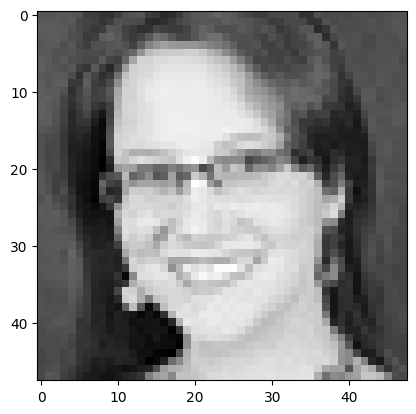

In [ ]:
image = '/content/drive/MyDrive/7.jpg'
print("original image is of happy")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of surprise
1/1 [==============================] - 0s 18ms/step
model prediction is  surprise


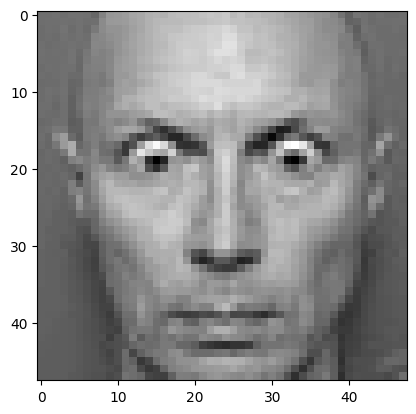

In [ ]:
image = '/content/drive/MyDrive/15.jpg'
print("original image is of surprise")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

In [ ]:
train.head()

,image,label
0,/content/drive/MyDrive/Teachmint split_config....,surprise
1,/content/drive/MyDrive/Teachmint split_config....,surprise
2,/content/drive/MyDrive/Teachmint split_config....,surprise
3,/content/drive/MyDrive/Teachmint split_config....,surprise
4,/content/drive/MyDrive/Teachmint split_config....,surprise


In [ ]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download the VADER lexicon (if you haven't already)
nltk.download('vader_lexicon')

# Initialize the SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
def map_emotion_to_sentiment_vader(emotion):
    sentiment_scores = sia.polarity_scores(emotion.lower())

    # Determine sentiment based on compound score
    compound_score = sentiment_scores['compound']

    if compound_score >= 0.05:
        return 'positive'
    elif compound_score <= -0.05:
        return 'negative'
    else:
        return 'neutral'



train['sentiment'] = train['label'].apply(map_emotion_to_sentiment_vader)

# Display the updated DataFrame
print(train)


                                                   image     label sentiment
0      /content/drive/MyDrive/Teachmint split_config....  surprise  positive
1      /content/drive/MyDrive/Teachmint split_config....  surprise  positive
2      /content/drive/MyDrive/Teachmint split_config....  surprise  positive
3      /content/drive/MyDrive/Teachmint split_config....  surprise  positive
4      /content/drive/MyDrive/Teachmint split_config....  surprise  positive
...                                                  ...       ...       ...
28877  /content/drive/MyDrive/Teachmint split_config....     angry  negative
28878  /content/drive/MyDrive/Teachmint split_config....     angry  negative
28879  /content/drive/MyDrive/Teachmint split_config....     angry  negative
28880  /content/drive/MyDrive/Teachmint split_config....     angry  negative
28881  /content/drive/MyDrive/Teachmint split_config....     angry  negative

[28882 rows x 3 columns]


In [ ]:
temp = train.groupby("sentiment").count().reset_index().sort_values(by="label", ascending=False)

temp

,sentiment,image,label
0,negative,13481,13481
2,positive,10419,10419
1,neutral,4982,4982


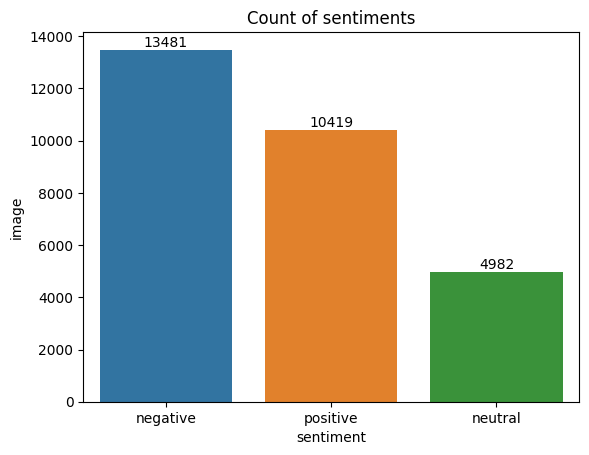

In [ ]:
plt.style.use('default')
a1 = sns.barplot(x="sentiment", y="image", data = temp)
a1.bar_label(a1.containers[0], )

plt.title("Count of sentiments")
plt.show()

In [ ]:
fig = go.Figure(go.Funnelarea(text=temp.sentiment, values=temp.image, title={"position": "top center", "text": "Funnel-Chart of Sentiment Distribution"}))

In [ ]:
fig.show(renderer='colab')

In [ ]:
temp1 = train.groupby("label").count().reset_index().sort_values(by="image", ascending=False)

temp1

,label,image,sentiment
3,happy,7214,7214
4,neutral,4982,4982
5,sad,4938,4938
2,fear,4103,4103
0,angry,4004,4004
6,surprise,3205,3205
1,disgust,436,436


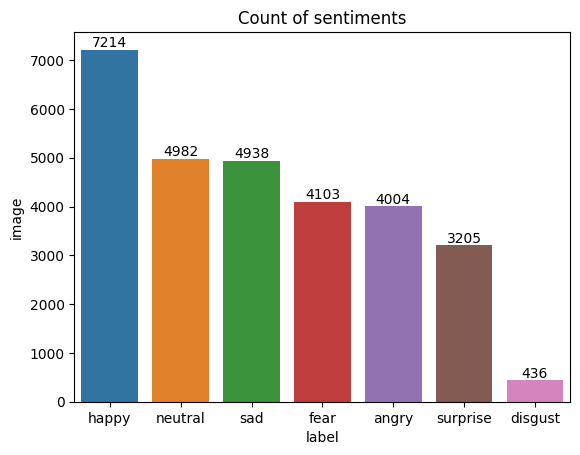

In [ ]:
plt.style.use('default')
a1 = sns.barplot(x="label", y="image", data = temp1)
a1.bar_label(a1.containers[0], )

plt.title("Count of sentiments")
plt.show()

In [ ]:
fig1 = go.Figure(go.Funnelarea(text=temp1.label, values=temp1.image, title={"position": "top center", "text": "Funnel-Chart of Sentiment Distribution"}))

In [ ]:
fig1.show(renderer='colab')

In [ ]:
from PIL import Image

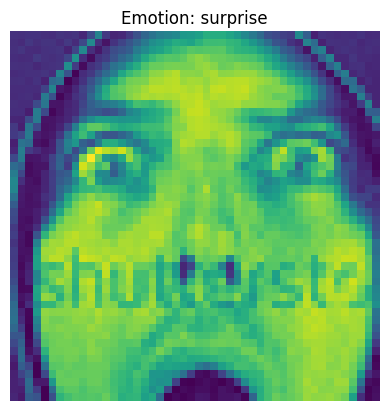

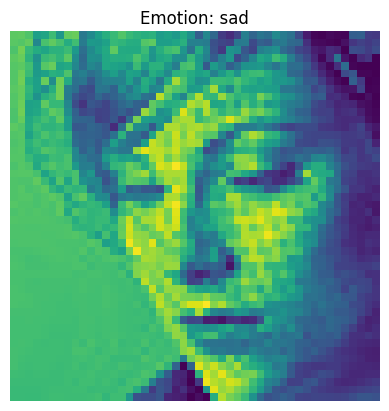

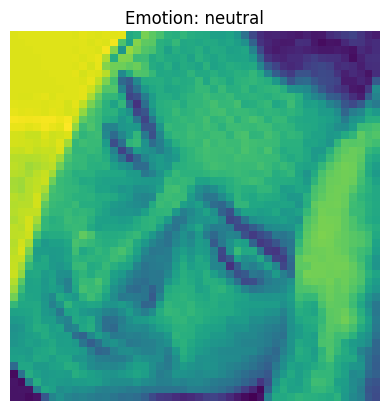

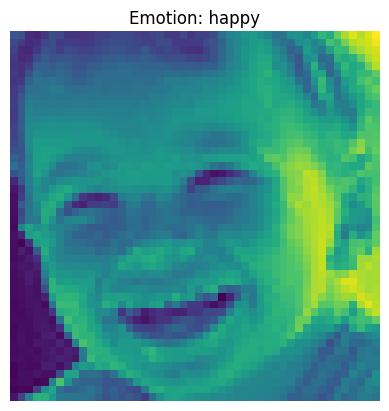

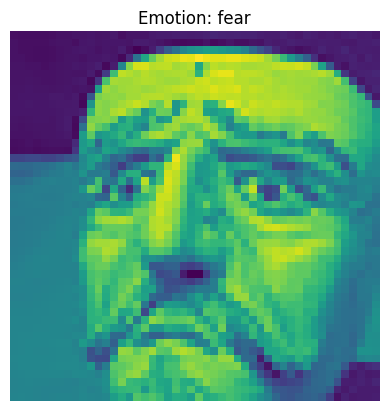

In [ ]:
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt

def display_highest_emotion_images(df, emotion_column, image_column, num_images=5):
    # Sort the DataFrame by emotion scores in descending order
    sorted_df = df.sort_values(by=emotion_column, ascending=False)

    # Use a set to keep track of unique emotion scores
    unique_emotions = set()

    # Display the selected images, skipping duplicates
    displayed_images = 0
    for index, row in sorted_df.iterrows():
        if displayed_images >= num_images:
            break  # Stop when the desired number of images is displayed
        emotion_score = row[emotion_column]

        # Skip duplicates
        if emotion_score in unique_emotions:
            continue

        image_path = row[image_column]

        # Open and display the image
        image = Image.open(image_path)
        plt.imshow(image)
        plt.title(f'Emotion: {emotion_score}')
        plt.axis('off')
        plt.show()

        unique_emotions.add(emotion_score)
        displayed_images += 1

# Example usage:
# Assuming your DataFrame is 'train' with columns 'label' for emotion and 'image' for image paths
display_highest_emotion_images(train, 'label', 'image', num_images=5)


